In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

### Constants

In [27]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [28]:
df = pd.read_csv('data/lane_changes_updated/lane_change_3.csv', sep=';')


In [29]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [30]:
df['accel_lon']=df['accel_lon'].add(OFFSET)
df['accel_trans']=df['accel_trans'].add(OFFSET)
df['accel_down']=df['accel_down'].add(OFFSET)

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)

### Hilbert indexing

In [31]:
resolution = 18; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = df[['accel_lon','accel_trans']].to_numpy()

# Generate Hilbert index
distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

### Hilbert Plots

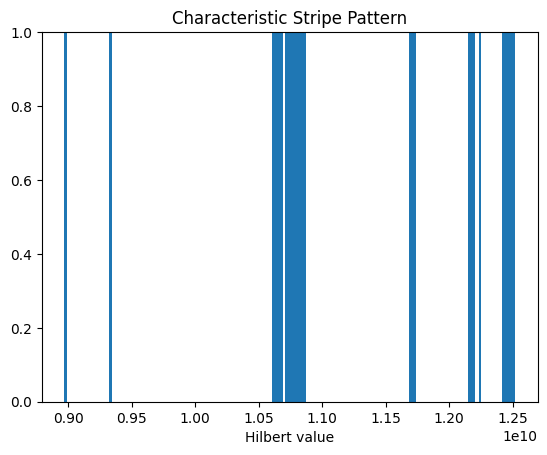

In [32]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df_hilbert['hilbert'], bins=200)

plt.xlabel('Hilbert value')

plt.title("Characteristic Stripe Pattern")

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
# limit x axis to take only "lane change relevant" data

plt.show()

### Scatter Plots

<Axes: xlabel='ts'>

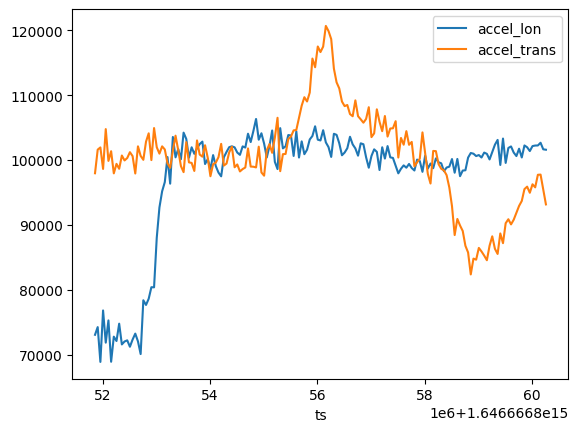

In [33]:
df.plot(x="ts", y=["accel_lon", "accel_trans"])

<Axes: xlabel='lat'>

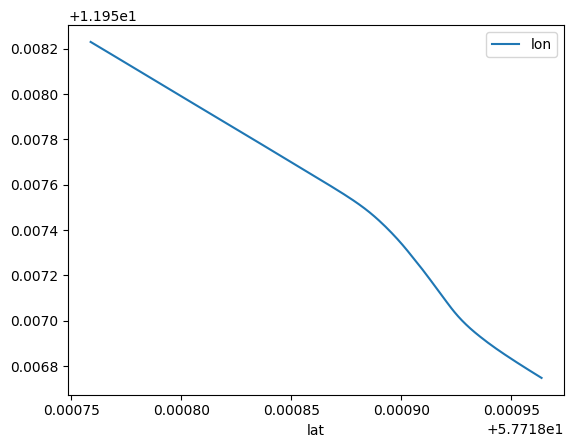

In [34]:
df.plot(x="lat", y="lon")

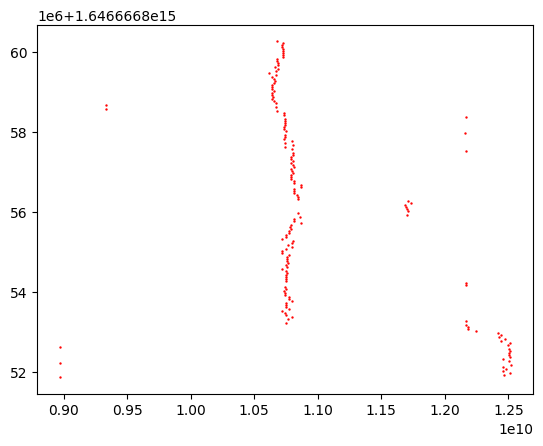

In [35]:
# Scatter plot of CSP over time
plt.scatter(x=df_hilbert['hilbert'],y=df_hilbert['ts'], c='red', s=0.5)

# Export .png for data analysis on spreadsheet
#plt.savefig('testhilbert.png', transparent=True)


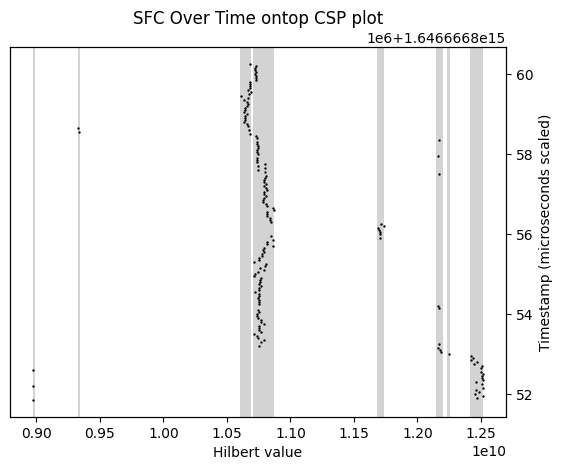

In [36]:
fig, ax = plt.subplots()

ax.hist(df_hilbert['hilbert'], bins=200, color="lightgray")
ax.set_ylim([0,1])
plt.gca().set_yticks([]) 

ax2 = ax.twinx()

ax2.scatter(x=df_hilbert['hilbert'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Hilbert value')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (microseconds scaled)')


plt.show()